Módulo 1: Calidad, preparación y limpieza de datos

**Autor:    Natalia Betancur Herrera**

Objetivos de la clase:

* Evaluar la completitud de los datos

* Analizar la unicidad mediante la detección de registros duplicados

* Identificar inconsistencias de formato, lógica y reglas de negocio

* Validar la validez de los datos


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# CARGAR BASE DE DATOS

In [11]:
import pandas as pd

# URL del archivo Excel en GitHub
url = 'https://github.com/NataliaBetancurH/Curso_Analisis_De_Datos_Con_Python/raw/main/dataset_ventas_sucio.xlsx'
df_original = pd.read_excel(url)

In [16]:
# Crear una copia del dataset
df = df_original.copy()


# Revisar que se haya leido de forma correcta
print("Vista previa (primeras 5 filas):")
df.head()

Vista previa (primeras 5 filas):


,id_pedido,fecha_pedido,producto,categoria,cantidad,precio_unitario,descuento,region,vendedor,cliente,metodo_pago,estado_pedido,calificacion,comentarios,email_cliente,subtotal,descuento_monto,total
0,370,2024-07-30,Tablet,computacion,36.0,2384.09,10.0,CALI,pedro martinez,empresa b,pse,ENTREGADO,5.0,NaN,empresa.b@,85827.24,8582.7240,77244.5160
1,25,2024-12-19,SSD,computacion,47.0,4043.91,15.0,Cali,Pedro Martínez,CLIENTE INDIVIDUAL,TARJETA CRÉDITO,Entregado,3.0,Regular,cliente.individual@yahoo.com,190063.77,28509.5655,161554.2045
2,451,2024-11-29,Smartphone,ACCESORIOS,7.0,2221.11,25.0,Barranquilla,carlos lopez,empresa b,PSE,PENDIENTE,4.0,NaN,empresa.b@empresa.com,15547.77,3886.9425,11660.8275
3,263,2024-04-23,Monitor,PERIFÉRICOS,11.0,3493.79,15.0,Cartagena,NaN,corporacion xyz,Efectivo,en proceso,4.0,Regular,corporacion.xyz@gmail.com,38431.69,5764.7535,32666.9365
4,123,2023-09-27,SSD,Computación,22.0,434.94,10.0,CARTAGENA,CARLOS LÓPEZ,Cliente Individual,efectivo,PENDIENTE,4.0,Excelente,cliente.individual@yahoo.com,9568.68,956.8680,8611.8120


In [17]:
#Analisis incial del tamaño del dataset
print(f"   Filas: {df.shape[0]:,}")
print(f"   Columnas: {df.shape[1]}")
print(f"   Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

   Filas: 550
   Columnas: 18
   Tamaño en memoria: 0.34 MB


In [19]:
# Revisión de columnas del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_pedido        550 non-null    int64         
 1   fecha_pedido     550 non-null    datetime64[ns]
 2   producto         550 non-null    object        
 3   categoria        550 non-null    object        
 4   cantidad         472 non-null    float64       
 5   precio_unitario  469 non-null    float64       
 6   descuento        468 non-null    float64       
 7   region           550 non-null    object        
 8   vendedor         475 non-null    object        
 9   cliente          475 non-null    object        
 10  metodo_pago      550 non-null    object        
 11  estado_pedido    550 non-null    object        
 12  calificacion     455 non-null    float64       
 13  comentarios      264 non-null    object        
 14  email_cliente    533 non-null    object   

# CALIDAD DE LOS DATOS

La calidad de datos se evalúa en 6 dimensiones principales:

1. COMPLETITUD: ¿Están todos los datos presentes?
2. UNICIDAD: ¿Hay registros duplicados?
3. CONSISTENCIA: ¿Los datos son coherentes entre sí?
4. VALIDEZ: ¿Los valores están en rangos aceptables?
5. PRECISIÓN: ¿Los datos son correctos?
6. ACTUALIDAD: ¿Los datos están actualizados?

## 1. COMPLETITUD

Evalúa si los datos necesarios para el análisis están presentes y disponibles.

Un conjunto de datos es completo cuando:

* no presenta valores faltantes críticos

* las variables clave tienen un nivel adecuado de información

* la ausencia de datos no introduce sesgos en el análisis



Ejemplo:


Fórmula: (Valores Presentes / Valores Totales) * 100

Clasificación:

- Excelente: ≥ 95% de completitud
- Aceptable: 80-95% de completitud
- Deficiente: < 80% de completitud

Importante: La completitud se mide como el porcentaje de valores presentes respecto al total esperado.
Los umbrales de evaluación son orientativos, no rígidos y deben interpretarse según el contexto del análisis, la importancia de la variable y el impacto de los valores faltantes en las conclusiones.

In [26]:
# Cálculos globales de completitud

total_celdas = df.shape[0] * df.shape[1]
valores_presentes = df.count().sum()
valores_faltantes = df.isnull().sum().sum()

completitud_global = (valores_presentes / total_celdas) * 100

print ("Total de celdas:", total_celdas)
print ("Valores presentes:", valores_presentes)
print ("Valores faltantes:", valores_faltantes)
print ("Completitud global:", completitud_global)

Total de celdas: 9900
Valores presentes: 9111
Valores faltantes: 789
Completitud global: 92.03030303030303


In [27]:
# Análisis de completitud por columna

completitud_columnas = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Presentes': df.count().values,
    'Valores_Faltantes': df.isnull().sum().values,
    'Total_Registros': len(df),
    'Completitud_%': (df.count().values / len(df)) * 100
})


completitud_columnas

,Columna,Valores_Presentes,Valores_Faltantes,Total_Registros,Completitud_%
0,id_pedido,550,0,550,100.000000
1,fecha_pedido,550,0,550,100.000000
2,producto,550,0,550,100.000000
3,categoria,550,0,550,100.000000
4,cantidad,472,78,550,85.818182
5,precio_unitario,469,81,550,85.272727
6,descuento,468,82,550,85.090909
7,region,550,0,550,100.000000
8,vendedor,475,75,550,86.363636
9,cliente,475,75,550,86.363636


In [28]:
# Clasificación de la calidad de los datos

def clasificar_completitud(porcentaje):
    if porcentaje >= 95:
        return ' Excelente'
    elif porcentaje >= 80:
        return ' Aceptable'
    else:
        return ' Deficiente'


completitud_columnas['Estado'] = completitud_columnas['Completitud_%'].apply(clasificar_completitud)
completitud_columnas = completitud_columnas.sort_values('Completitud_%')

completitud_columnas

,Columna,Valores_Presentes,Valores_Faltantes,Total_Registros,Completitud_%,Estado
13,comentarios,264,286,550,48.000000,Deficiente
12,calificacion,455,95,550,82.727273,Aceptable
6,descuento,468,82,550,85.090909,Aceptable
5,precio_unitario,469,81,550,85.272727,Aceptable
4,cantidad,472,78,550,85.818182,Aceptable
8,vendedor,475,75,550,86.363636,Aceptable
9,cliente,475,75,550,86.363636,Aceptable
14,email_cliente,533,17,550,96.909091,Excelente
7,region,550,0,550,100.000000,Excelente
1,fecha_pedido,550,0,550,100.000000,Excelente


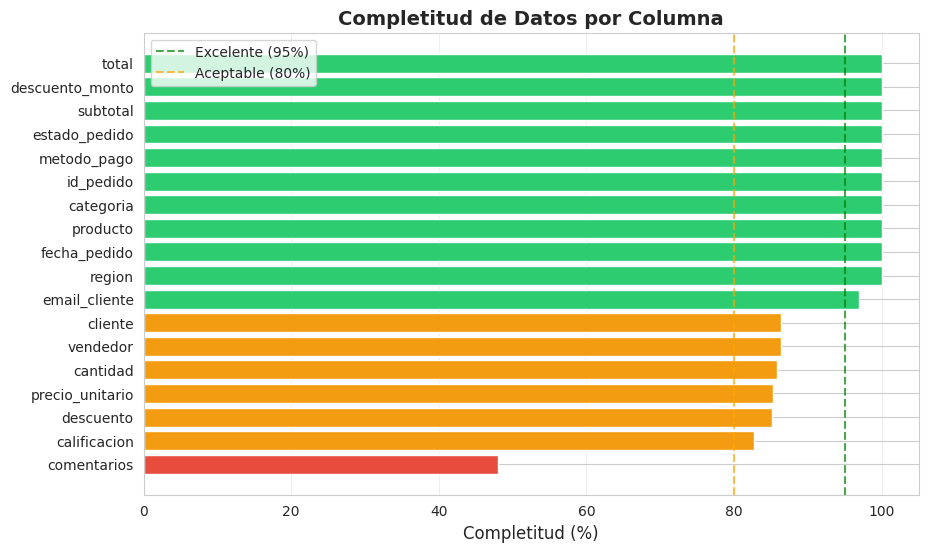

In [33]:
# Visualización de resultados


# Crear la figura y definir el tamaño del gráfico (ancho x alto en pulgadas)
plt.figure(figsize=(10, 6))

# Definir el color de cada barra según el porcentaje de completitud
# Verde: completitud excelente (≥ 95%)
# Naranja: completitud aceptable (80% – 95%)
# Rojo: completitud deficiente (< 80%)

colors = completitud_columnas['Completitud_%'].apply(
    lambda x: '#2ecc71' if x >= 95 else '#f39c12' if x >= 80 else '#e74c3c'
)

# Crear el gráfico de barras horizontales
# Eje Y: nombres de las columnas
# Eje X: porcentaje de completitud de cada columna
# color: color asignado según la calidad de los datos
plt.barh(
    completitud_columnas['Columna'],
    completitud_columnas['Completitud_%'],
    color=colors
)

# Dibujar una línea vertical que marca el umbral de completitud excelente (95%)
plt.axvline(
    x=95,
    color='green',
    linestyle='--',
    alpha=0.7,
    label='Excelente (95%)'
)

# Dibujar una línea vertical que marca el umbral de completitud aceptable (80%)
plt.axvline(
    x=80,
    color='orange',
    linestyle='--',
    alpha=0.7,
    label='Aceptable (80%)'
)

# Etiqueta del eje X
plt.xlabel('Completitud (%)', fontsize=12)

# Título del gráfico
plt.title(
    'Completitud de Datos por Columna',
    fontsize=14,
    fontweight='bold'
)

# Mostrar la leyenda que explica los umbrales
plt.legend()

# Agregar una cuadrícula ligera en el eje X para facilitar la lectura
plt.grid(axis='x', alpha=0.3)


## UNICIDAD

Mide la ausencia de duplicados en el dataset.

Tipos de duplicados:
1. Duplicados Exactos: Todas las columnas son idénticas
2. Duplicados por Clave: Solo la columna clave (ID) se repite
3. Duplicados Funcionales: Registros que representan la misma entidad

Fórmula: (Registros Únicos / Total Registros) * 100

In [40]:
# Configuración

# Definir la columna que actúa como identificador lógico del registro
columna_clave = 'id_pedido'

# Calcular el número total de registros del dataset
total_registros = len(df)
print(f" Total de registros: {total_registros:,}")

 Total de registros: 550


### Duplicados exactos

In [41]:

# Contar registros completamente duplicados (todas las columnas iguales)
duplicados_exactos = df.duplicated().sum()

# Calcular cuántos registros son realmente únicos
registros_unicos_exactos = total_registros - duplicados_exactos

# Calcular el porcentaje de unicidad considerando duplicados exactos
unicidad_exacta = (registros_unicos_exactos / total_registros) * 100


# Mostrar resultados de duplicados exactos
print("\n  Duplicados Exactos:")
print(f"  - Cantidad: {duplicados_exactos:,}")
print(f"  - Porcentaje: {(duplicados_exactos / total_registros) * 100:.2f}%")
print(f"  - Unicidad: {unicidad_exacta:.2f}%")


  Duplicados Exactos:
  - Cantidad: 3
  - Porcentaje: 0.55%
  - Unicidad: 99.45%


### Duplicados por clave

In [42]:

# Verificar si la columna clave existe en el DataFrame
if columna_clave in df.columns:

    # Contar cuántos valores de la clave están repetidos
    duplicados_clave = df[columna_clave].duplicated().sum()

    # Contar cuántos valores únicos existen en la columna clave
    valores_unicos_clave = df[columna_clave].nunique()

    # Calcular el porcentaje de unicidad basado en la columna clave
    unicidad_clave = ((total_registros - duplicados_clave) / total_registros) * 100

else:
    # Si la columna clave no existe, se asume unicidad total
    duplicados_clave = 0
    valores_unicos_clave = 0
    unicidad_clave = 100

# Mostrar resultados de duplicados por clave
print(f"\n Duplicados por Clave ({columna_clave})")
print(f"  - IDs únicos: {valores_unicos_clave:,}")
print(f"  - IDs duplicados: {duplicados_clave:,}")
print(f"  - Unicidad: {unicidad_clave:.2f}%")



 Duplicados por Clave (id_pedido)
  - IDs únicos: 500
  - IDs duplicados: 50
  - Unicidad: 90.91%


### Ejemplo de registros duplicados

In [43]:
# Mostrar algunos ejemplos de duplicados exactos, si existen
if duplicados_exactos > 0:
    print("\n Ejemplo de Duplicados Exactos (primeros registros):")

    # Filtrar todos los registros que hacen parte de algún duplicado
    duplicados_df = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

    # Mostrar solo algunas columnas relevantes para el análisis
    print(
        duplicados_df.head(10)[
            ['id_pedido', 'producto', 'cantidad', 'precio_unitario']
        ]
    )

# Mostrar los IDs que aparecen más de una vez en la columna clave
if duplicados_clave > 0:
    print(f"\n IDs con Duplicados en la columna '{columna_clave}':")

    # Contar cuántas veces aparece cada ID duplicado
    ids_duplicados = (
        df[df[columna_clave].duplicated(keep=False)][columna_clave]
        .value_counts()
        .head(10)
    )

    print(ids_duplicados)


 Ejemplo de Duplicados Exactos (primeros registros):
     id_pedido     producto  cantidad  precio_unitario
158         34  Auriculares      38.0          4248.23
277         34  Auriculares      38.0          4248.23
269        290   Procesador      35.0          4414.10
283        290   Procesador      35.0          4414.10
262        293          SSD       5.0          4401.40
337        293          SSD       5.0          4401.40

 IDs con Duplicados en la columna 'id_pedido':
id_pedido
37     3
244    3
159    3
100    2
205    2
153    2
334    2
254    2
167    2
21     2
Name: count, dtype: int64


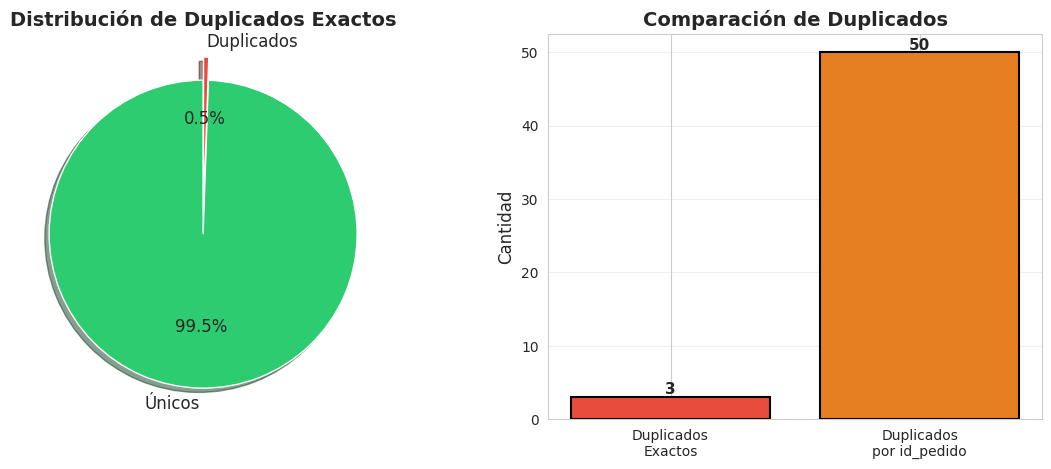

In [44]:
# Visualización de resultados

# Crear una figura con dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


# Gráfico de pastel para duplicados exactos

# Etiquetas y valores para el gráfico
labels = ['Únicos', 'Duplicados']
sizes = [registros_unicos_exactos, duplicados_exactos]

# Definir colores para cada categoría
colors = ['#2ecc71', '#e74c3c']

# Separar ligeramente la porción de duplicados para enfatizarla
explode = (0.05, 0.1)

# Crear el gráfico de pastel
ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    textprops={'fontsize': 12}
)

# Título del gráfico
ax1.set_title('Distribución de Duplicados Exactos', fontsize=14, fontweight='bold')


# Gráfico de barras para comparación de duplicados

# Categorías y valores a comparar
categorias = ['Duplicados\nExactos', f'Duplicados\npor {columna_clave}']
valores = [duplicados_exactos, duplicados_clave]

# Crear el gráfico de barras
bars = ax2.bar(
    categorias,
    valores,
    color=['#e74c3c', '#e67e22'],
    edgecolor='black',
    linewidth=1.5
)

# Etiquetas y título del gráfico
ax2.set_ylabel('Cantidad', fontsize=12)
ax2.set_title('Comparación de Duplicados', fontsize=14, fontweight='bold')

# Agregar cuadrícula para facilitar la lectura
ax2.grid(axis='y', alpha=0.3)

# Agregar el valor numérico sobre cada barra
for bar in bars:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# CONSISTENCIA

Mide si los datos son coherentes entre sí.

Tipos de inconsistencias:
1. Formato: Mismos datos en diferentes formatos (mayúsculas/minúsculas, espacios)
2. Lógica: Valores que violan reglas de negocio (negativos, fechas inválidas)
3. Dominio: Valores fuera del dominio esperado (rangos)
4. Referencial: Relaciones entre columnas inválidas

In [45]:
# Diccionario para almacenar las inconsistencias encontradas
inconsistencias = {
    'formato': {},   # Problemas de escritura, mayúsculas, espacios, etc.
    'logica': {},    # Violaciones a reglas de negocio
    'dominio': {}    # Valores fuera de rangos permitidos
}


### Inconsistencias de formato

In [46]:
# Inconsistencias de formato

# Columnas categóricas de texto a evaluar
columnas_texto = [
    'categoria', 'region', 'vendedor',
    'cliente', 'estado_pedido', 'metodo_pago'
]

for col in columnas_texto:
    if col in df.columns:

        # Valores originales tal como vienen en el dataset
        valores_originales = df[col].dropna().unique()

        # Valores normalizados:
        # strip(): elimina espacios al inicio y final
        # title(): unifica formato de texto
        valores_normalizados = (
            df[col]
            .str.strip()
            .str.title()
            .dropna()
            .unique()
        )

        # Si al normalizar disminuye la cantidad de valores únicos,
        # significa que había inconsistencias de formato
        if len(valores_originales) > len(valores_normalizados):

            diferencia = len(valores_originales) - len(valores_normalizados)
            inconsistencias['formato'][col] = diferencia

            print(f"\n  Columna: {col}")
            print(f"   • Valores únicos originales: {len(valores_originales)}")
            print(f"   • Valores únicos normalizados: {len(valores_normalizados)}")
            print(f"   • Inconsistencias detectadas: {diferencia}")
            print(f"   • Ejemplos: {list(valores_originales[:5])}")



  Columna: categoria
   • Valores únicos originales: 30
   • Valores únicos normalizados: 7
   • Inconsistencias detectadas: 23
   • Ejemplos: ['computacion', 'ACCESORIOS', 'PERIFÉRICOS', 'Computación', ' accesorios']

  Columna: region
   • Valores únicos originales: 33
   • Valores únicos normalizados: 7
   • Inconsistencias detectadas: 26
   • Ejemplos: ['CALI', 'Cali', 'Barranquilla', 'Cartagena', 'CARTAGENA']

  Columna: vendedor
   • Valores únicos originales: 27
   • Valores únicos normalizados: 11
   • Inconsistencias detectadas: 16
   • Ejemplos: ['pedro martinez', 'Pedro Martínez', '  carlos lopez  ', 'CARLOS LÓPEZ', 'Ana Garcia']

  Columna: cliente
   • Valores únicos originales: 29
   • Valores únicos normalizados: 7
   • Inconsistencias detectadas: 22
   • Ejemplos: ['empresa b', 'CLIENTE INDIVIDUAL', 'corporacion xyz', 'Cliente Individual', 'Empresa B']

  Columna: estado_pedido
   • Valores únicos originales: 12
   • Valores únicos normalizados: 4
   • Inconsistencias 

### Inconsistencias lógicas


In [48]:
# Cantidades negativas (no válidas en la mayoría de contextos)
if 'cantidad' in df.columns:
    negativos = (df['cantidad'] < 0).sum()
    if negativos > 0:
        inconsistencias['logica']['cantidad_negativa'] = negativos
        print(f" Cantidades negativas: {negativos}")


# Precios negativos
if 'precio_unitario' in df.columns:
    negativos = (df['precio_unitario'] < 0).sum()
    if negativos > 0:
        inconsistencias['logica']['precio_negativo'] = negativos
        print(f" Precios negativos: {negativos}")


# Verificación de cálculo de subtotales
if all(col in df.columns for col in ['cantidad', 'precio_unitario', 'subtotal']):
    df_temp = df.dropna(subset=['cantidad', 'precio_unitario', 'subtotal'])
    subtotal_calculado = df_temp['cantidad'] * df_temp['precio_unitario']
    errores = (abs(df_temp['subtotal'] - subtotal_calculado) > 0.01).sum()

    if errores > 0:
        inconsistencias['logica']['calculos_incorrectos'] = errores
        print(f" Subtotales incorrectos: {errores}")


# Fechas futuras (inconsistentes temporalmente)
if 'fecha_pedido' in df.columns:
    df['fecha_pedido'] = pd.to_datetime(df['fecha_pedido'], errors='coerce')
    futuras = (df['fecha_pedido'] > datetime.now()).sum()

    if futuras > 0:
        inconsistencias['logica']['fechas_futuras'] = futuras
        print(f" Fechas futuras: {futuras}")


 Cantidades negativas: 13
 Precios negativos: 9
 Subtotales incorrectos: 49
 Fechas futuras: 10


### Consistencia de dominio

In [49]:
# Descuentos fuera del rango 0–100 %
if 'descuento' in df.columns:
    fuera_rango = ((df['descuento'] < 0) | (df['descuento'] > 100)).sum()
    if fuera_rango > 0:
        inconsistencias['dominio']['descuento_invalido'] = fuera_rango
        print(f" Descuentos fuera de rango: {fuera_rango}")


# Calificaciones fuera del rango esperado (1–5)
if 'calificacion' in df.columns:
    fuera_rango = ((df['calificacion'] < 1) | (df['calificacion'] > 5)).sum()
    if fuera_rango > 0:
        inconsistencias['dominio']['calificacion_invalida'] = fuera_rango
        print(f" Calificaciones fuera de rango: {fuera_rango}")

 Descuentos fuera de rango: 10
 Calificaciones fuera de rango: 10


In [51]:
# Resumen

total_formato = sum(inconsistencias['formato'].values())
total_logica = sum(inconsistencias['logica'].values())
total_dominio = sum(inconsistencias['dominio'].values())
total_inconsistencias = total_formato + total_logica + total_dominio


print(f"\n RESUMEN DE INCONSISTENCIAS:")
print(f"   • Formato: {total_formato}")
print(f"   • Lógica: {total_logica}")
print(f"   • Dominio: {total_dominio}")
print(f"   • TOTAL: {total_inconsistencias}")


 RESUMEN DE INCONSISTENCIAS:
   • Formato: 101
   • Lógica: 81
   • Dominio: 20
   • TOTAL: 202


### Visualización de inconsistencias

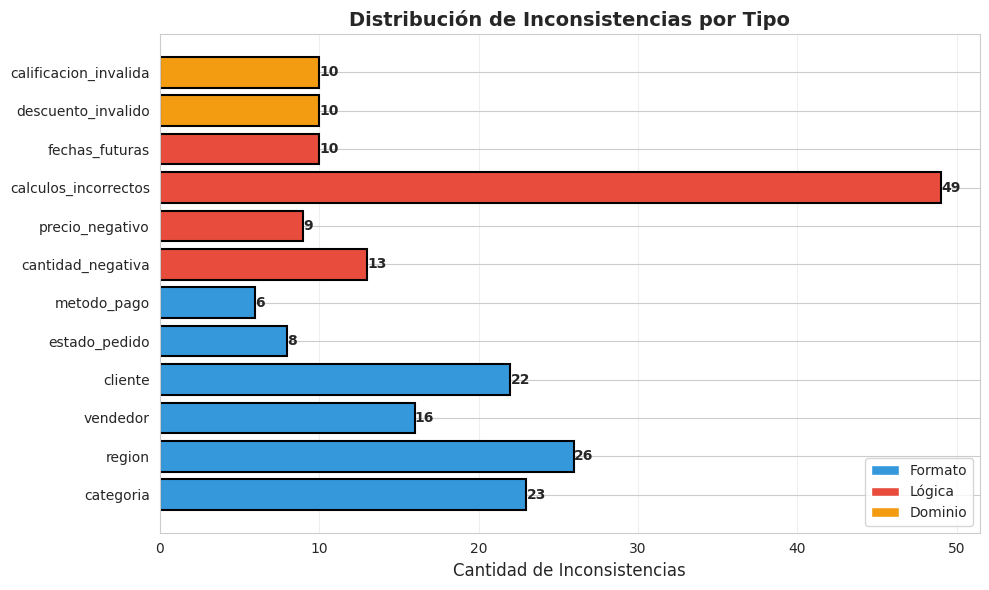


 Gráfico guardado: '3_evaluacion_consistencia.png'


In [54]:
# Solo se genera la visualización si se encontraron inconsistencias
if total_inconsistencias > 0:

    # Crear la figura y el eje del gráfico
    fig, ax = plt.subplots(figsize=(10, 6))


    # Preparación de datos para el gráfico


    # Unir todas las categorías de inconsistencias(formato + lógica + dominio)
    categorias = (
        list(inconsistencias['formato'].keys()) +
        list(inconsistencias['logica'].keys()) +
        list(inconsistencias['dominio'].keys())
    )

    # Unir los valores correspondientes a cada categoría
    valores = (
        list(inconsistencias['formato'].values()) +
        list(inconsistencias['logica'].values()) +
        list(inconsistencias['dominio'].values())
    )

    # Asignar colores según el tipo de inconsistencia:
    colores = (
        ['#3498db'] * len(inconsistencias['formato']) +
        ['#e74c3c'] * len(inconsistencias['logica']) +
        ['#f39c12'] * len(inconsistencias['dominio'])
    )


    # Creación del gráfico

    # Gráfico de barras horizontales
    bars = ax.barh(
        categorias,
        valores,
        color=colores,
        edgecolor='black',
        linewidth=1.5
    )

    # Etiqueta del eje X
    ax.set_xlabel('Cantidad de Inconsistencias', fontsize=12)

    # Título del gráfico
    ax.set_title(
        'Distribución de Inconsistencias por Tipo',
        fontsize=14,
        fontweight='bold'
    )

    # Agregar cuadrícula ligera para facilitar la lectura
    ax.grid(axis='x', alpha=0.3)


    # Agregar etiquetas numéricas a cada barra

    for bar in bars:
        width = bar.get_width()

        # Mostrar el valor exacto al final de cada barra
        ax.text(
            width,
            bar.get_y() + bar.get_height() / 2,
            f'{int(width):,}',
            ha='left',
            va='center',
            fontsize=10,
            fontweight='bold'
        )

    # Leyenda manual por tipo de inconsistencia

    from matplotlib.patches import Patch

    legend_elements = [
        Patch(facecolor='#3498db', label='Formato'),
        Patch(facecolor='#e74c3c', label='Lógica'),
        Patch(facecolor='#f39c12', label='Dominio')
    ]

    ax.legend(handles=legend_elements, loc='lower right')


    # Ajustes finales y guardado


    # Ajustar automáticamente los márgenes
    plt.tight_layout()

    # Guardar el gráfico como imagen
    plt.savefig(
        '3_evaluacion_consistencia.png',
        dpi=300,
        bbox_inches='tight'
    )

    # Mostrar el gráfico
    plt.show()

    print("\n Gráfico guardado: '3_evaluacion_consistencia.png'")


#VALIDEZ DE RANGOS

Verifica que los valores estén dentro de rangos esperados.

Tipos de rangos:
- Rangos Duros: Límites absolutos que NO deben violarse (ej: descuento 0-100%)
- Rangos Suaves: Límites recomendados con posibles excepciones (ej: precio < $100,000)

In [55]:
# Manejo de fechas para el reporte final
from datetime import datetime

# Análisis y manipulación de datos
import pandas as pd

# Visualización
import matplotlib.pyplot as plt

### Definición de reglas de negocio para rangos válidos

In [56]:
# Reglas de validación por columna
# tipo duro: valores inválidos no deberían existir
# tipo suave: valores atípicos pero posibles
reglas_rangos = {
    'cantidad': {'min': 1, 'max': 1000, 'tipo': 'suave'},
    'precio_unitario': {'min': 0, 'max': 100000, 'tipo': 'suave'},
    'descuento': {'min': 0, 'max': 100, 'tipo': 'duro'},
    'calificacion': {'min': 1, 'max': 5, 'tipo': 'duro'}
}

### Evaluación de rangos

In [62]:
# Diccionario para almacenar violaciones por columna
violaciones = {}

# Lista para visualización posterior
resultados_rangos = []

# Lista para tabla resumen
resumen_rangos = []

# Contador global de violaciones
total_violaciones = 0


for columna, reglas in reglas_rangos.items():

    # Verificar que la columna exista en el DataFrame
    if columna in df.columns:

        # Eliminar valores nulos
        serie = df[columna].dropna()

        # Conteo de valores fuera de rango
        violaciones_min = (serie < reglas['min']).sum()
        violaciones_max = (serie > reglas['max']).sum()

        # Total de violaciones por columna
        total_columna = violaciones_min + violaciones_max
        total_violaciones += total_columna

        # Guardar detalle SOLO si hay violaciones
        if total_columna > 0:
            violaciones[columna] = {
                'min': violaciones_min,
                'max': violaciones_max,
                'total': total_columna,
                'tipo': reglas['tipo']
            }

        # Guardar fila resumen
        resumen_rangos.append({
            'Columna': columna,
            'Mín': reglas['min'],
            'Máx': reglas['max'],
            'Tipo': reglas['tipo'],
            'Violaciones': total_columna,
            'Estado': 'OK' if total_columna == 0 else 'Revisar'
        })

        # Guardar para gráficos
        resultados_rangos.append({
            'columna': columna,
            'violaciones': total_columna
        })



df_resumen_rangos = pd.DataFrame(resumen_rangos)

print("\n RESUMEN DE VALIDEZ POR COLUMNA")
print("─" * 80)
print(df_resumen_rangos.to_string(index=False))



 RESUMEN DE VALIDEZ POR COLUMNA
────────────────────────────────────────────────────────────────────────────────
        Columna  Mín    Máx  Tipo  Violaciones  Estado
       cantidad    1   1000 suave           32 Revisar
precio_unitario    0 100000 suave           24 Revisar
      descuento    0    100  duro           10 Revisar
   calificacion    1      5  duro           10 Revisar


# PRECISIÓN

¿Los datos reflejan fielmente la realidad que intentan describir?

La precisión evalúa qué tan correctos y confiables son los valores almacenados. Un dato puede ser válido (estar dentro de un rango permitido) pero aun así ser impreciso si no representa adecuadamente el fenómeno real.

Este aspecto se analiza mediante la comparación con fuentes de referencia, la aplicación de reglas de negocio, la detección de valores atípicos y la identificación de patrones sospechosos que indiquen errores de medición, registro o captura.

Ejemplo precio incorrecto pero válido

Dato registrado: precio_unitario = 9999

Rango válido: 0 a 100000

Problema:
Aunque el valor está dentro del rango permitido, el precio real del producto es 99.99

# ACTUALIDAD

¿Los datos están vigentes y son útiles en el contexto actual?

La actualidad mide qué tan reciente y relevante es la información en función del tiempo transcurrido desde su última actualización. Aunque un dato sea correcto y consistente, puede perder valor si está desactualizado.

Este criterio es clave para la toma de decisiones, especialmente en escenarios dinámicos, donde datos obsoletos pueden conducir a análisis incorrectos o conclusiones poco confiables.

Ejemplo pedido antiguo

Dato registrado: estado_pedido = En proceso

Fecha del pedido: hace 2 años

Problema:
Es poco probable que el pedido siga en proceso.